<a href="https://colab.research.google.com/github/ManuelRomero2025/CienciasdeDatos1/blob/main/00_Ventas_De_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el contexto del mercado inmobiliario del condado de King, en los Estados Unidos, el análisis de datos juega un papel fundamental para mejorar la toma de decisiones en procesos de compra y venta de propiedades. A partir de un conjunto de datos detallado extraído del libro Practical Statistics for Data Scientists de Peter Bruce, Andrew Bruce y Peter Gedeck, se cuenta con información de 22.688 ventas de viviendas, distribuidas en 22 variables que describen características clave como precio de venta, tamaño del inmueble, número de habitaciones y baños, año de construcción, entre otros indicadores relevantes.

Desde la perspectiva de la ciencia de datos, este escenario representa una oportunidad estratégica para desarrollar modelos de predicción que estimen el valor de una vivienda con base en sus atributos estructurales y contextuales. No obstante, antes de abordar cualquier técnica de modelado, la visualización de datos se convierte en una herramienta esencial para explorar relaciones, identificar patrones, detectar valores atípicos y comunicar hallazgos de manera efectiva.

El objetivo principal de este análisis es brindar soporte a los agentes inmobiliarios mediante una herramienta visual e interpretativa que les permita estimar precios de viviendas de forma rápida y precisa. Para ello, se implementarán diferentes técnicas de visualización, tales como diagramas de dispersión, mapas de calor, histogramas, boxplots y gráficos multivariantes, que facilitarán la comprensión de cómo interactúan las variables y cuál es su impacto sobre los precios en el mercado regional.

# **Cargar Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# **Cargar archivo desde Google Drive**

In [ ]:
# Asegúrate de haber montado Google Drive previamente
# from google.colab import drive
# drive.mount('/content/drive')

# Leer el archivo desde Drive
df = pd.read_csv('/content/drive/MyDrive/CienciasDatos2025/house_sales.csv')

# **Limpieza inicial y transformación de fechas**

In [ ]:
df_limpio = df.copy()

# Convertir columna de fecha
df_limpio['DocumentDate'] = pd.to_datetime(df_limpio['DocumentDate'], errors='coerce')

# Eliminar duplicados
df_limpio = df_limpio.drop_duplicates()

# Convertir 'ym' (año-mes) a datetime
df_limpio['ym'] = pd.to_datetime(df_limpio['ym'], format='%Y-%m-%d', errors='coerce')

# Crear columnas Año y Mes
df_limpio['Anio'] = df_limpio['ym'].dt.year
df_limpio['Mes'] = df_limpio['ym'].dt.month

# **Renombrar columnas al español**



In [ ]:
# Diccionario de traducciones de nombres de columnas al español
traducciones = {
    'DocumentDate': 'FechaDocumento',
    'SalePrice': 'PrecioVenta',
    'PropertyID': 'IDPropiedad',
    'PropertyType': 'TipoPropiedad',
    'ym': 'AnioMes',
    'zhvi_px': 'ZHVI_Precio',
    'zhvi_idx': 'ZHVI_Indice',
    'AdjSalePrice': 'PrecioVentaAjustado',
    'NbrLivingUnits': 'UnidadesHabitables',
    'SqFtLot': 'MetrosLote',
    'SqFtTotLiving': 'MetrosTotalesHabitables',
    'SqFtFinBasement': 'MetrosSotano',
    'Bathrooms': 'Banos',
    'Bedrooms': 'Habitaciones',
    'BldgGrade': 'CalidadConstruccion',
    'YrBuilt': 'AnioConstruccion',
    'YrRenovated': 'AnioRenovacion',
    'TrafficNoise': 'RuidoTrafico',
    'LandVal': 'ValorTerreno',
    'ImpsVal': 'ValorConstruccion',
    'ZipCode': 'CodigoPostal',
    'NewConstruction': 'NuevaConstruccion'
}

# Aplicar renombramiento definitivo a la base de datos principal
df.rename(columns=traducciones, inplace=True)

# También se recomienda renombrar en la copia de trabajo si la estás utilizando
df_limpio.rename(columns=traducciones, inplace=True)
df_limpio.head()


,FechaDocumento,PrecioVenta,IDPropiedad,TipoPropiedad,AnioMes,ZHVI_Precio,ZHVI_Indice,PrecioVentaAjustado,UnidadesHabitables,MetrosLote,...,CalidadConstruccion,AnioConstruccion,AnioRenovacion,RuidoTrafico,ValorTerreno,ValorConstruccion,CodigoPostal,NuevaConstruccion,Anio,Mes
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,7,1991,0,0,70000,229000,98002,False,2014,9
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,10,2005,0,0,203000,590000,98166,True,2006,6
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,8,1947,0,0,183000,275000,98166,False,2007,1
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,7,1966,0,0,104000,229000,98168,False,2008,2
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,7,1948,0,0,104000,205000,98168,False,2013,3


# **Nombres de las variables**

In [ ]:
df.columns.to_list()

['FechaDocumento',
 'PrecioVenta',
 'IDPropiedad',
 'TipoPropiedad',
 'AnioMes',
 'ZHVI_Precio',
 'ZHVI_Indice',
 'PrecioVentaAjustado',
 'UnidadesHabitables',
 'MetrosLote',
 'MetrosTotalesHabitables',
 'MetrosSotano',
 'Banos',
 'Habitaciones',
 'CalidadConstruccion',
 'AnioConstruccion',
 'AnioRenovacion',
 'RuidoTrafico',
 'ValorTerreno',
 'ValorConstruccion',
 'CodigoPostal',
 'NuevaConstruccion']

# **Sola variable categórica**

In [ ]:
df['TipoPropiedad'].unique()

array(['Multiplex', 'Single Family', 'Townhouse'], dtype=object)

# **cambiar nombres de niveles**

In [ ]:
df['TipoPropiedad'] = df['TipoPropiedad'].replace({
    'Single Family': 'Residencial Unifamiliar',
    'Condominium': 'Condominio',
    'Multi-Family': 'Multifamiliar'
})

In [ ]:
df['TipoPropiedad'].unique()

array(['Multiplex', 'Residencial Unifamiliar', 'Townhouse'], dtype=object)

# **Gráfico de Barras**

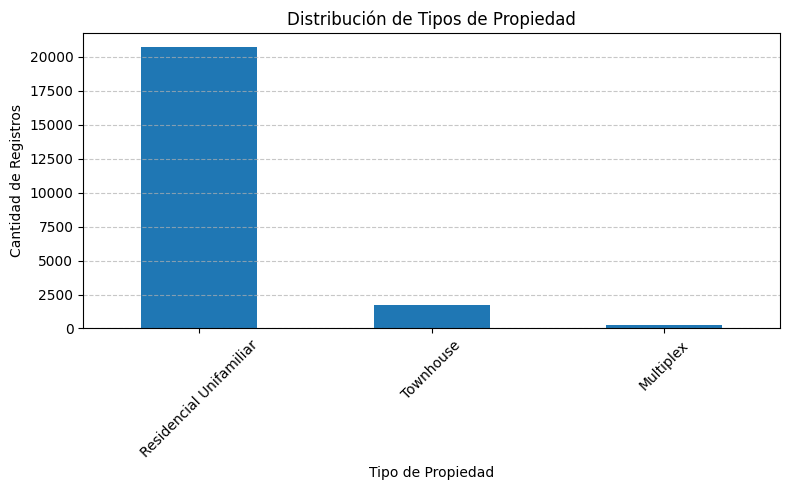

In [ ]:
# Contar la cantidad de registros por tipo de propiedad
conteo_tipos = df["TipoPropiedad"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
conteo_tipos.plot(kind='bar')
plt.title("Distribución de Tipos de Propiedad")
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


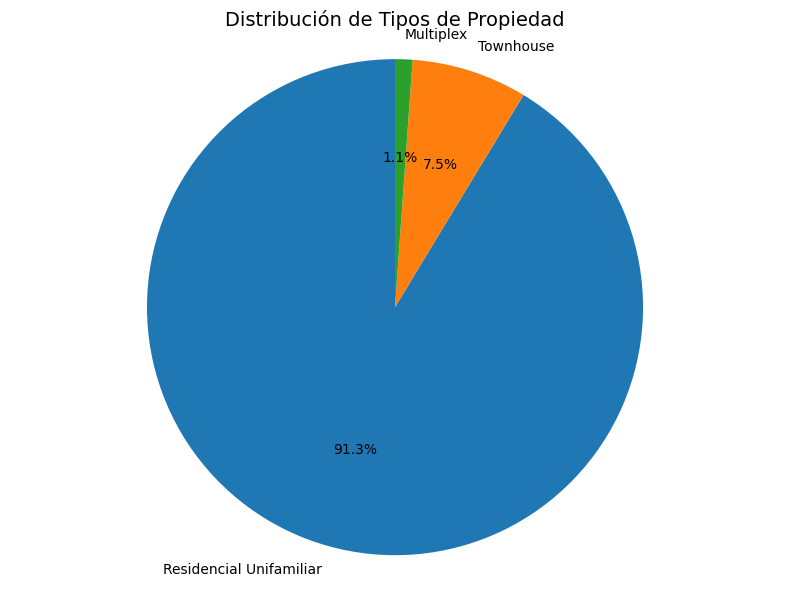

In [ ]:
# Contar la cantidad de registros por tipo de propiedad (nombre correcto)
conteo_tipos = df["TipoPropiedad"].value_counts()

# Crear gráfico de sectores (pastel)
plt.figure(figsize=(8, 6))
plt.pie(conteo_tipos, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Tipos de Propiedad", fontsize=14)
plt.axis('equal')  # Para que el círculo sea perfectamente redondo
plt.tight_layout()
plt.show()


# **Filtrar**

In [ ]:
df_residencial = df[df['TipoPropiedad'] == 'Residencial Unifamiliar']
df_residencial.head()


,FechaDocumento,PrecioVenta,IDPropiedad,TipoPropiedad,AnioMes,ZHVI_Precio,ZHVI_Indice,PrecioVentaAjustado,UnidadesHabitables,MetrosLote,...,Banos,Habitaciones,CalidadConstruccion,AnioConstruccion,AnioRenovacion,RuidoTrafico,ValorTerreno,ValorConstruccion,CodigoPostal,NuevaConstruccion
1,2006-06-16,1000000,1200013,Residencial Unifamiliar,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Residencial Unifamiliar,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Residencial Unifamiliar,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Residencial Unifamiliar,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
6,2013-08-28,327500,3800004,Residencial Unifamiliar,2013-08-01,374300,0.860064,380785.0,1,34465,...,1.50,3,8,1961,0,0,165000,227000,98178,False


Outliers detectados: [1000000 1285000 1713000 ... 1870000 2475000 1580000]


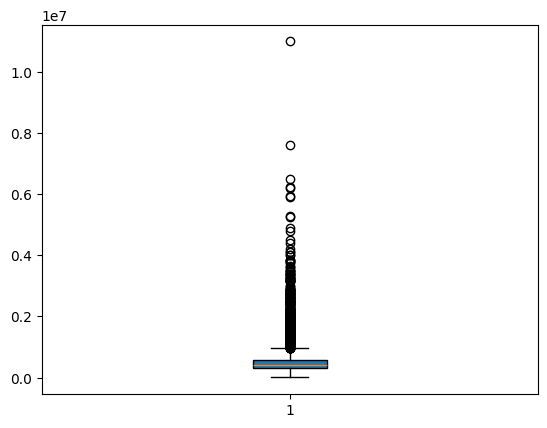

In [ ]:
# Use 'PrecioVenta' for boxplot instead of 'TipoPropiedad'
fig = plt.figure()
ax = fig.add_subplot()
box = ax.boxplot(df['PrecioVenta'], patch_artist=True)  # Change to 'PrecioVenta'

# Access the data (this part may need adjustment depending on what you want to extract)
stats = box['fliers'][0].get_ydata()
print("Outliers detectados:", stats)

In [ ]:
data=df[['PrecioVenta', 'TipoPropiedad']]
data.head(10)

,PrecioVenta,TipoPropiedad
0,280000,Multiplex
1,1000000,Residencial Unifamiliar
2,745000,Residencial Unifamiliar
3,425000,Residencial Unifamiliar
4,240000,Residencial Unifamiliar
5,349900,Townhouse
6,327500,Residencial Unifamiliar
7,347000,Residencial Unifamiliar
8,220400,Residencial Unifamiliar
9,437500,Multiplex


In [ ]:
# Group the data
grouped = data.groupby('TipoPropiedad')
# Do some overview statistics
print(grouped.describe())

                        PrecioVenta                                          \
                              count           mean            std       min   
TipoPropiedad                                                                 
Multiplex                     257.0  499526.498054  191583.316876  120000.0   
Residencial Unifamiliar     20720.0  517038.039382  358494.857489   10480.0   
Townhouse                    1710.0  398756.626901  135964.159640    3000.0   

                                                                    
                               25%       50%       75%         max  
TipoPropiedad                                                       
Multiplex                359950.00  478210.0  600000.0   1675000.0  
Residencial Unifamiliar  326000.00  429327.0  599950.0  11000000.0  
Townhouse                316777.25  379900.0  450000.0   2060000.0  


In [ ]:
media=data["PrecioVenta"].mean()
print(f"Mediana de PrecioVenta: {media}")

Mediana de PrecioVenta: 507924.3759862476


In [ ]:
median=data["PrecioVenta"].median()
print(f"Mediana de PrecioVenta: {median}")

Mediana de PrecioVenta: 424650.0


In [ ]:
# Por ejemplo, para la variable PrecioVenta
moda = stats.mode(data['PrecioVenta'], keepdims=True)

# Mostrar el valor de la moda y cuántas veces aparece
print(f"Moda: {moda.mode[0]:,.2f}")
print(f"Frecuencia: {moda.count[0]}")


Moda: 350,000.00
Frecuencia: 207


In [ ]:
var=data["PrecioVenta"].var()
print(f"Varianza de PrecioVenta: {var}")

Varianza de PrecioVenta: 120157082442.37874


In [ ]:
std=data["PrecioVenta"].std()
print(f"Desviación de PrecioVenta: {std}")

Desviación de PrecioVenta: 346636.816340069


In [ ]:
# Rango de la variable PrecioVenta
rango = df['PrecioVenta'].max() - df['PrecioVenta'].min()
print(f"Rango de PrecioVenta: {rango:,.2f}")

Rango de PrecioVenta: 10,997,000.00


In [ ]:
# Group the data
grouped_data = data.groupby('TipoPropiedad')
# Do some overview statistics
print(grouped_data.mean())

                           PrecioVenta
TipoPropiedad                         
Multiplex                499526.498054
Residencial Unifamiliar  517038.039382
Townhouse                398756.626901


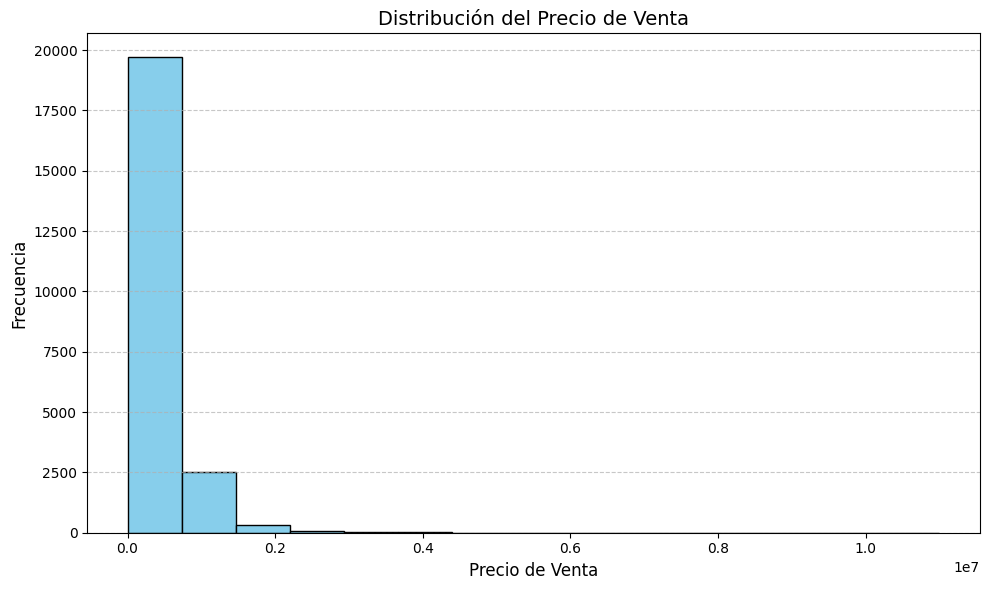

In [ ]:
# Histograma de PrecioVenta
plt.figure(figsize=(10, 6))
plt.hist(data['PrecioVenta'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribución del Precio de Venta", fontsize=14)
plt.xlabel("Precio de Venta", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

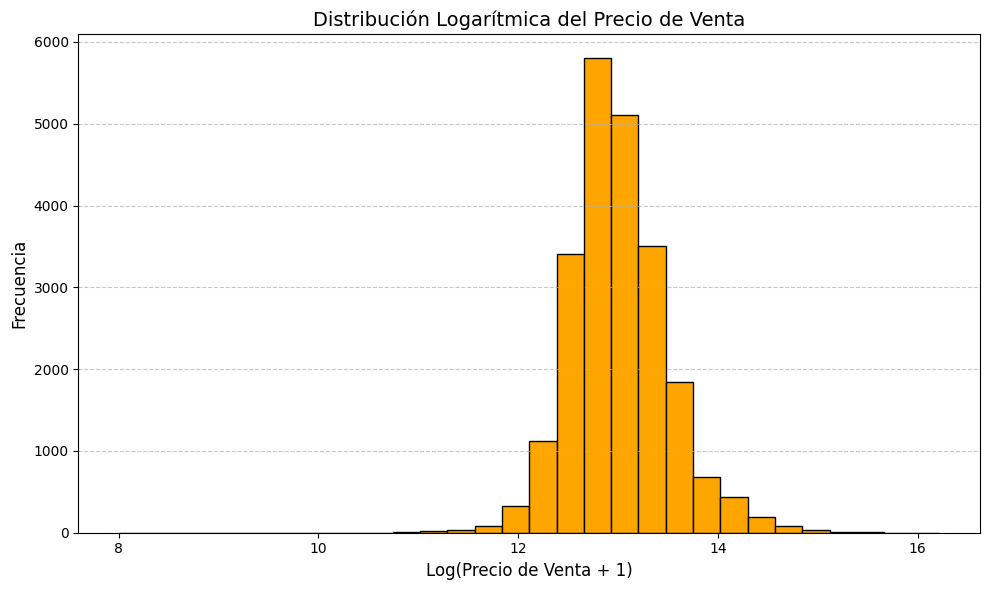

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(data['PrecioVenta'] + 1), bins=30, color='orange', edgecolor='black')
plt.title("Distribución Logarítmica del Precio de Venta", fontsize=14)
plt.xlabel("Log(Precio de Venta + 1)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


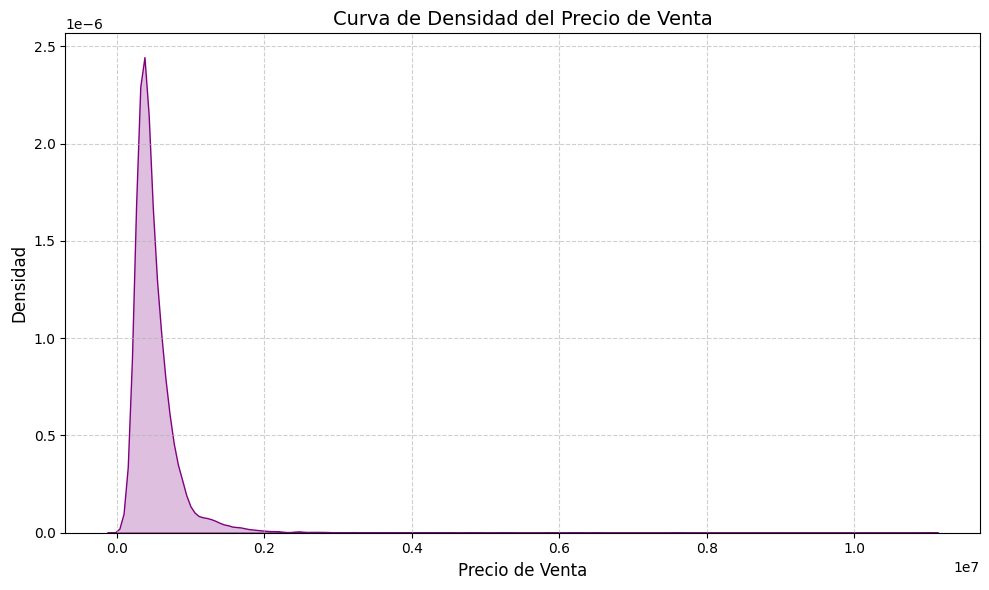

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['PrecioVenta'], fill=True, color='purple')
plt.title("Curva de Densidad del Precio de Venta", fontsize=14)
plt.xlabel("Precio de Venta", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


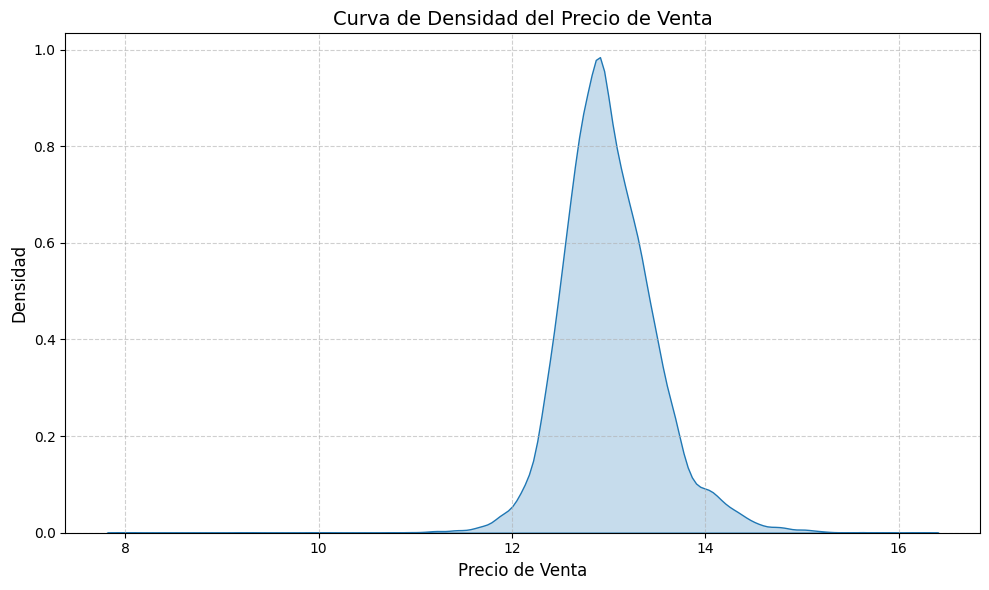

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log(data['PrecioVenta'] + 1), fill=True)
plt.title("Curva de Densidad del Precio de Venta", fontsize=14)
plt.xlabel("Precio de Venta", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

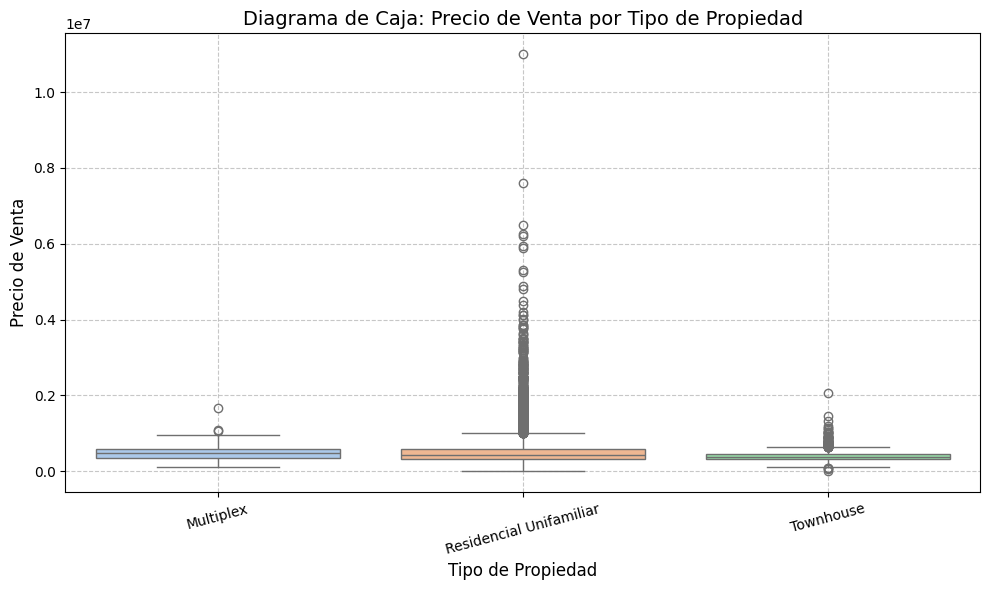

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='TipoPropiedad', y='PrecioVenta', hue='TipoPropiedad', palette='pastel', legend=False)

plt.title("Diagrama de Caja: Precio de Venta por Tipo de Propiedad", fontsize=14)
plt.xlabel("Tipo de Propiedad", fontsize=12)
plt.ylabel("Precio de Venta", fontsize=12)
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


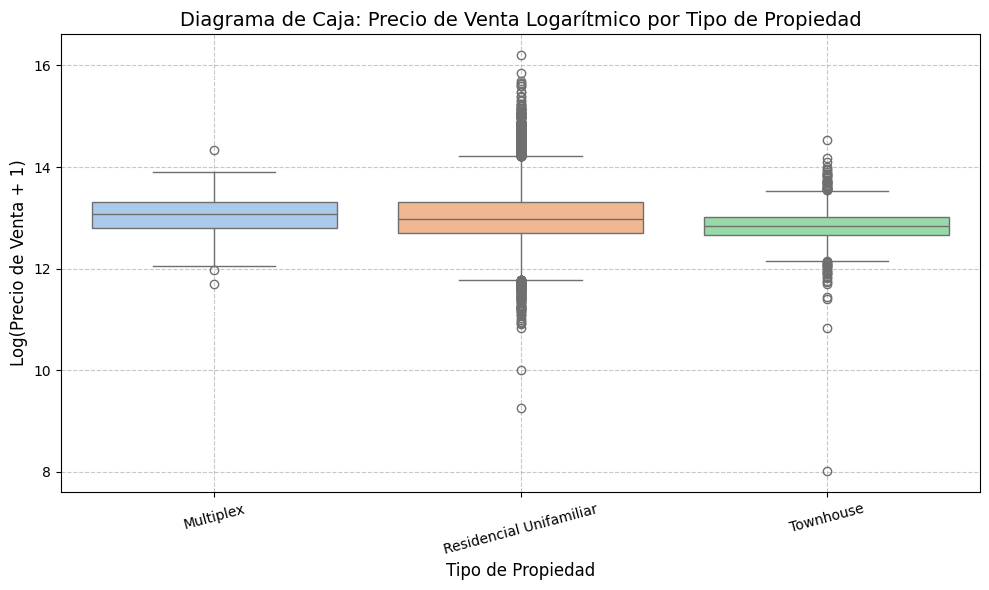

In [ ]:
data_log = data.copy()  # Create a copy to avoid modifying the original data
data_log['PrecioVenta_log'] = np.log(data_log['PrecioVenta'] + 1)  # Apply log transformation

# Now you can use data_log in your boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_log, x='TipoPropiedad', y='PrecioVenta_log',
            hue='TipoPropiedad', palette='pastel')

plt.title("Diagrama de Caja: Precio de Venta Logarítmico por Tipo de Propiedad", fontsize=14)
plt.xlabel("Tipo de Propiedad", fontsize=12)
plt.ylabel("Log(Precio de Venta + 1)", fontsize=12)
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Estadísticos descriptivos generales**

In [ ]:
# Calcular estadísticos descriptivos para la variable PrecioVenta
estadisticos_precio = df_limpio['PrecioVenta'].describe().to_frame(name='PrecioVenta')

# Formatear los valores sin notación científica (con separador de miles y dos decimales)
estadisticos_formateados = estadisticos_precio.applymap(lambda x: f"{x:,.2f}")

# Imprimir los resultados
print("Estadísticos Descriptivos Generales:")
print(estadisticos_formateados)


Estadísticos Descriptivos Generales:
         PrecioVenta
count      22,687.00
mean      507,924.38
std       346,636.82
min         3,000.00
25%       325,000.00
50%       424,650.00
75%       585,000.00
max    11,000,000.00


<ipython-input-89-6022ffc1116c>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  estadisticos_formateados = estadisticos_precio.applymap(lambda x: f"{x:,.2f}")


# **Estadísticos descriptivos agrupados por año**

In [ ]:
# Calcular estadísticos descriptivos agrupados por año para PrecioVenta
estadisticos_por_anio = df_limpio.groupby('Anio')['PrecioVenta'].describe()

# Mostrar los resultados con formato sin notación científica
print("\n Estadísticos Descriptivos de PrecioVenta por Año:")
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print(estadisticos_por_anio)



 Estadísticos Descriptivos de PrecioVenta por Año:
        count       mean        std        min        25%        50%  \
Anio                                                                   
2006 8,176.00 506,599.67 342,737.66   3,000.00 330,000.00 424,860.50   
2007 4,928.00 561,296.01 348,602.68 125,900.00 360,000.00 467,803.50   
2008 2,355.00 531,625.97 357,549.44 105,000.00 348,000.00 445,000.00   
2009 1,878.00 471,975.04 303,240.57 112,756.00 312,775.00 401,500.00   
2010 1,711.00 477,933.11 358,480.17  55,000.00 294,000.00 394,000.00   
2011 1,260.00 445,351.18 311,932.64  62,000.00 268,950.00 372,000.00   
2012   999.00 439,313.79 270,401.56  67,500.00 261,000.00 377,000.00   
2013   766.00 506,965.60 459,737.54  75,000.00 289,187.50 398,500.00   
2014   458.00 468,093.17 378,046.82  22,151.00 245,862.50 378,750.00   
2015   156.00 361,689.56 340,974.12  89,950.00 172,875.00 284,000.00   

            75%           max  
Anio                           
2006 579,950.00 11,

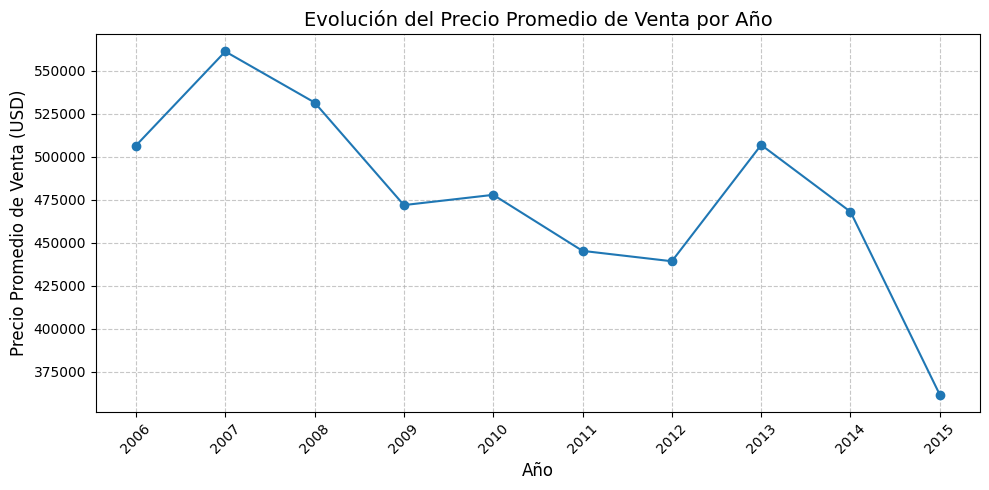

In [ ]:
# Extraer solo el promedio (mean) por año
promedio_por_anio = df_limpio.groupby('Anio')['PrecioVenta'].mean()

# Crear gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(promedio_por_anio.index, promedio_por_anio.values, marker='o', linestyle='-')
plt.title("Evolución del Precio Promedio de Venta por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio Promedio de Venta (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(promedio_por_anio.index, rotation=45)
plt.tight_layout()
plt.show()


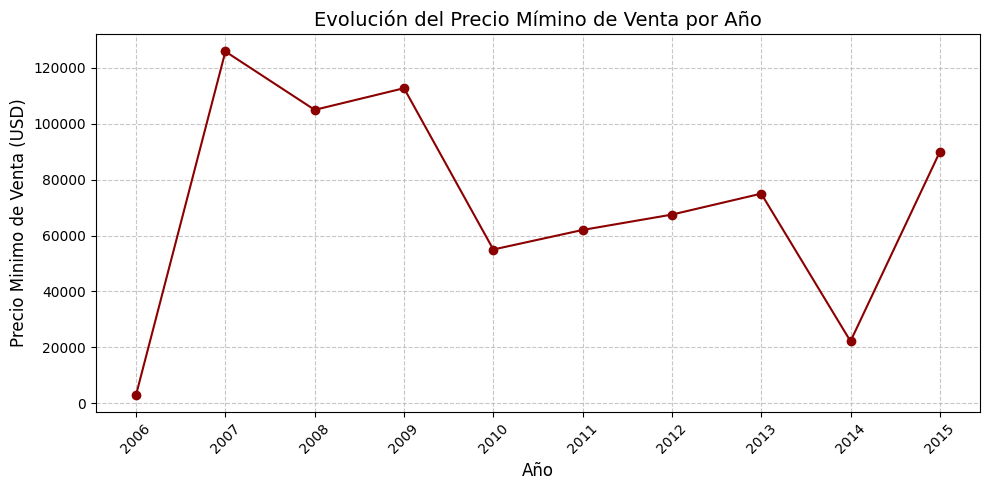

In [ ]:
# Usar los estadísticos previamente calculados
# Extraer la columna 'max' de la tabla de estadísticos agrupados por año
minimo_por_anio = estadisticos_por_anio['min']

# Crear gráfico de líneas para los valores máximos
plt.figure(figsize=(10, 5))
plt.plot(minimo_por_anio.index, minimo_por_anio.values, marker='o', linestyle='-', color='darkred')
plt.title("Evolución del Precio Mímino de Venta por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio Minimo de Venta (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(min(minimo_por_anio.index), max(minimo_por_anio.index)+1), rotation=45)
plt.tight_layout()
plt.show()


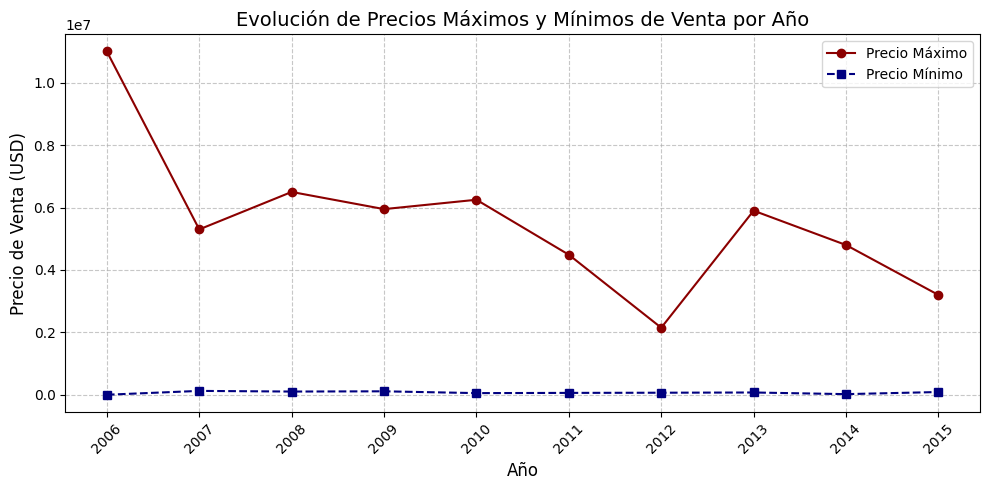

In [ ]:
# Extraer los valores máximos y mínimos desde la tabla de estadísticos agrupados por año
maximos_por_anio = estadisticos_por_anio['max']
minimos_por_anio = estadisticos_por_anio['min']

# Crear gráfico combinado
plt.figure(figsize=(10, 5))
plt.plot(maximos_por_anio.index, maximos_por_anio.values, marker='o', linestyle='-', color='darkred', label='Precio Máximo')
plt.plot(minimos_por_anio.index, minimos_por_anio.values, marker='s', linestyle='--', color='navy', label='Precio Mínimo')

plt.title("Evolución de Precios Máximos y Mínimos de Venta por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio de Venta (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(min(maximos_por_anio.index), max(maximos_por_anio.index)+1), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


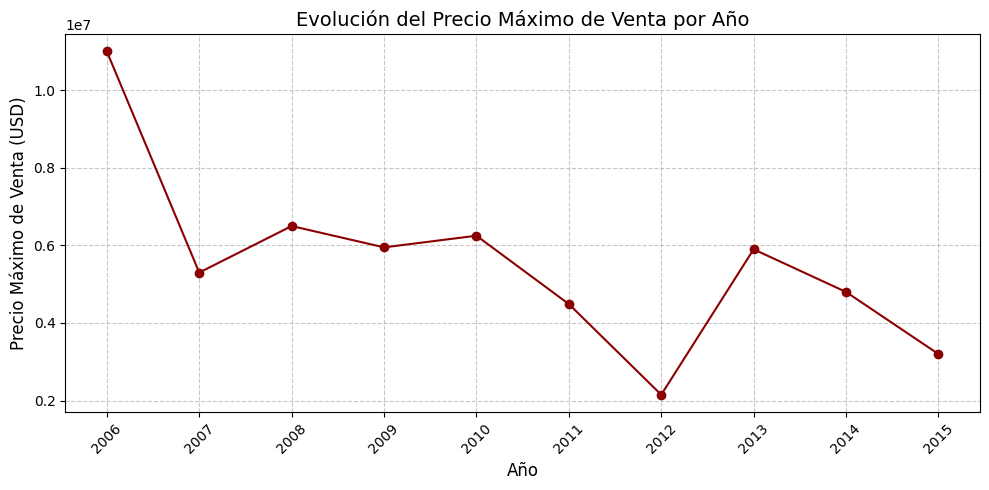

In [ ]:
# Usar los estadísticos previamente calculados
# Extraer la columna 'max' de la tabla de estadísticos agrupados por año
maximos_por_anio = estadisticos_por_anio['max']

# Crear gráfico de líneas para los valores máximos
plt.figure(figsize=(10, 5))
plt.plot(maximos_por_anio.index, maximos_por_anio.values, marker='o', linestyle='-', color='darkred')
plt.title("Evolución del Precio Máximo de Venta por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio Máximo de Venta (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(min(maximos_por_anio.index), max(maximos_por_anio.index)+1), rotation=45)
plt.tight_layout()
plt.show()

# **Diagrama de Boxplot**

<Figure size 1200x600 with 0 Axes>

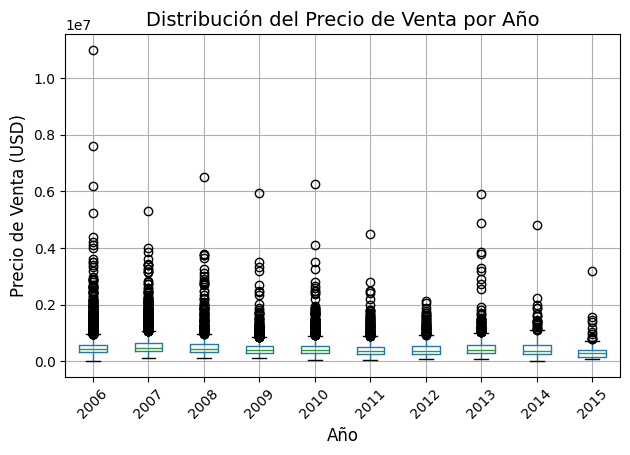

In [ ]:
# Crear un boxplot del precio de venta por año
plt.figure(figsize=(12, 6))
df_limpio.boxplot(column='PrecioVenta', by='Anio', grid=True, showfliers=True)

plt.title("Distribución del Precio de Venta por Año", fontsize=14)
plt.suptitle("")  # Eliminar el título automático generado por pandas
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio de Venta (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import skew, kurtosis

# Calcular la simetría (skewness) y curtosis (kurtosis) de SalePrice
simetria = skew(df_limpio['PrecioVenta'])
curtosis = kurtosis(df_limpio['PrecioVenta'], fisher=True)  # fisher=True devuelve curtosis "exceso"

# Mostrar resultados con formato claro
resultado_simetria_curtosis = pd.DataFrame({
    'Métrica': ['Simetría (Skewness)', 'Curtosis (Kurtosis de Exceso)'],
    'Valor': [simetria, curtosis]
})

print(resultado_simetria_curtosis)


                         Métrica      Valor
0            Simetría (Skewness)   5.880256
1  Curtosis (Kurtosis de Exceso)  82.165181


In [ ]:
# Calcular simetría y curtosis por año
simetria_por_anio = df_limpio.groupby('Anio')['PrecioVenta'].apply(skew)
curtosis_por_anio = df_limpio.groupby('Anio')['PrecioVenta'].apply(lambda x: kurtosis(x, fisher=True))

# Unir los resultados en un DataFrame
simetria_curtosis_anio = pd.DataFrame({
    'Simetría (Skewness)': simetria_por_anio,
    'Curtosis (Exceso)': curtosis_por_anio
})

# Formatear para presentación clara
simetria_curtosis_anio_formateada = simetria_curtosis_anio.round(3)
print(simetria_curtosis_anio_formateada)


      Simetría (Skewness)  Curtosis (Exceso)
Anio                                        
2006                8.137            158.870
2007                3.691             23.449
2008                5.488             53.561
2009                6.071             74.423
2010                5.432             55.613
2011                4.096             31.672
2012                2.252              7.440
2013                5.566             46.190
2014                4.418             39.019
2015                4.618             31.042


# **transformación logarítmica**

* La asimetría es alta (skewness > 5).

* Hay valores máximos de millones, y mínimos de pocos miles.

* Alta asimetría positiva (muchos valores bajos y pocos muy altos).

* Alta curtosis, indicando muchos valores extremos.

El logaritmo reduce la escala de los valores grandes, “comprime” los extremos y mejora la simetría, haciendo que el boxplot sea más interpretable.

<Figure size 1200x600 with 0 Axes>

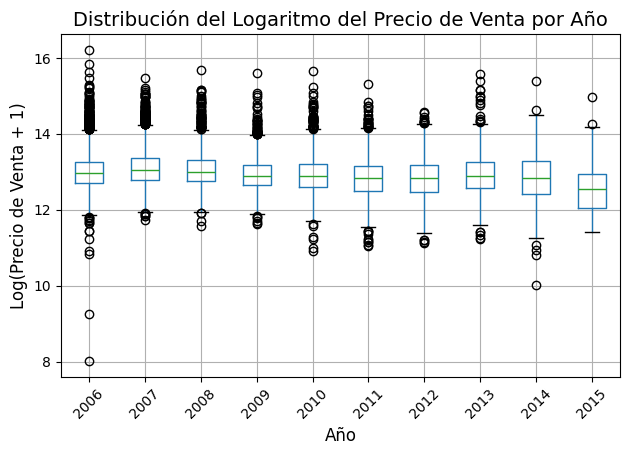

In [ ]:
# Aplicar la transformación logarítmica
df_limpio['PrecioVenta_log'] = np.log(df_limpio['PrecioVenta'] + 1)

# Crear boxplot del precio transformado por año
plt.figure(figsize=(12, 6))
df_limpio.boxplot(column='PrecioVenta_log', by='Anio', grid=True, showfliers=True)

plt.title("Distribución del Logaritmo del Precio de Venta por Año", fontsize=14)
plt.suptitle("")  # Quitar título automático
plt.xlabel("Año", fontsize=12)
plt.ylabel("Log(Precio de Venta + 1)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Evolución del Precio Promedio Logarítmico por Año**

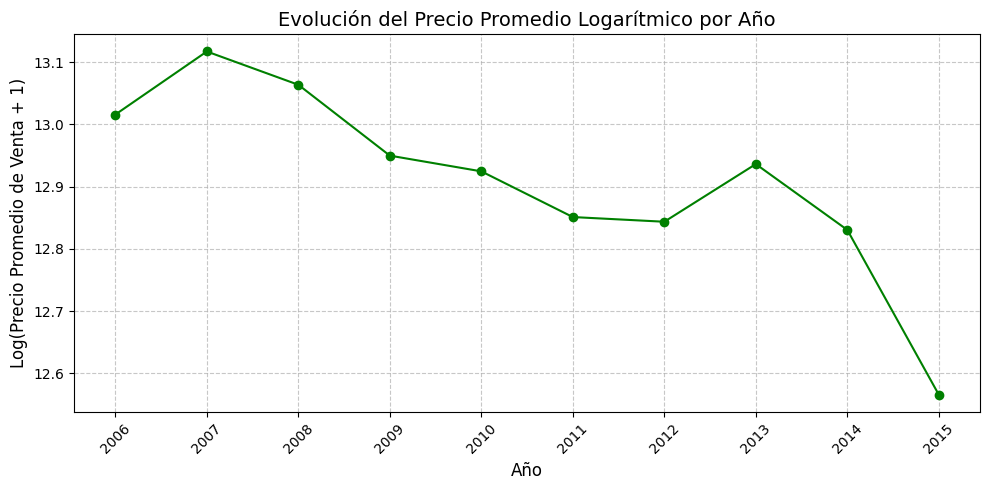

In [ ]:
promedio_log_por_anio = df_limpio.groupby('Anio')['PrecioVenta_log'].mean()

plt.figure(figsize=(10, 5))
plt.plot(promedio_log_por_anio.index, promedio_log_por_anio.values, marker='o', linestyle='-', color='green')
plt.title("Evolución del Precio Promedio Logarítmico por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Log(Precio Promedio de Venta + 1)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(min(promedio_log_por_anio.index), max(promedio_log_por_anio.index)+1), rotation=45)
plt.tight_layout()
plt.show()

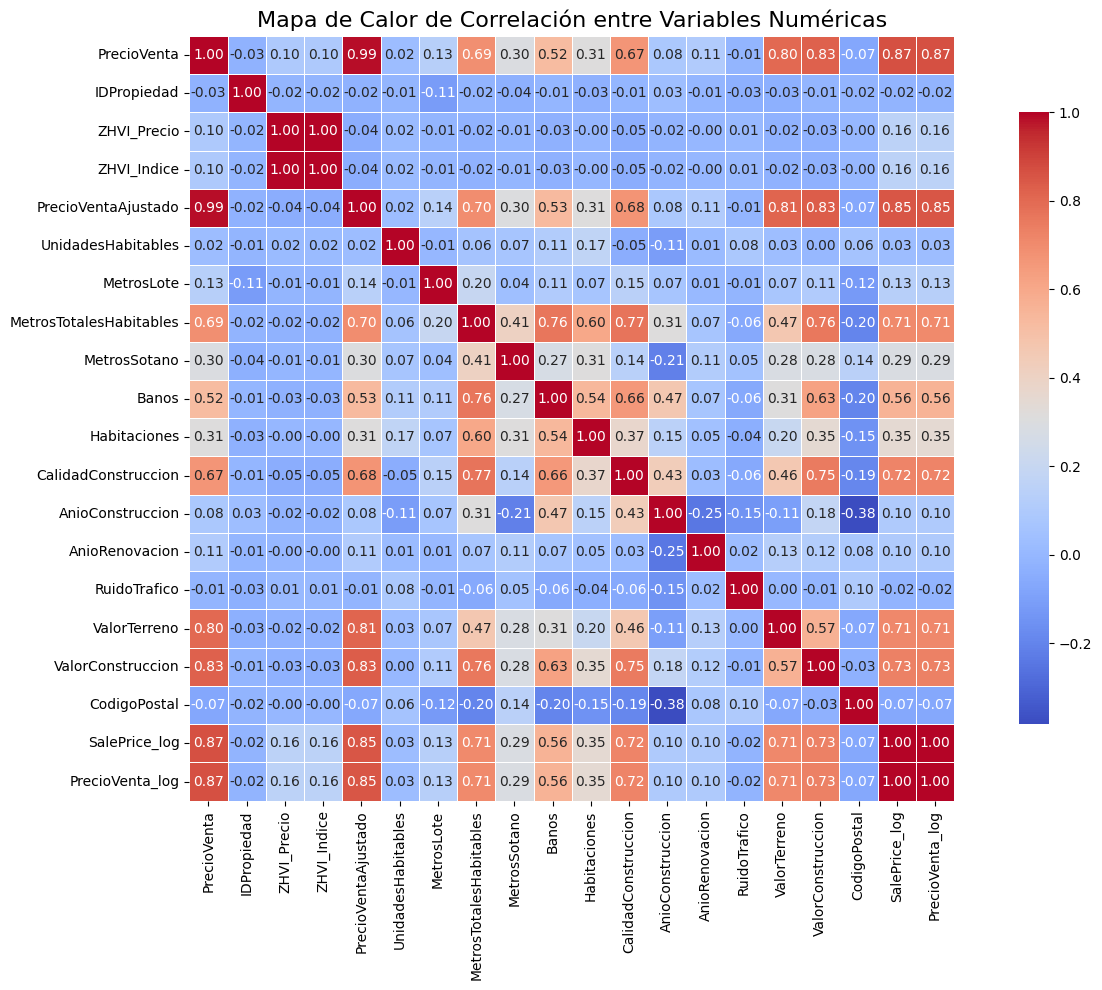

In [ ]:
# Seleccionar solo las columnas numéricas del dataframe limpio
variables_numericas = df_limpio.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Crear mapa de calor (heatmap)
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Mapa de Calor de Correlación entre Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


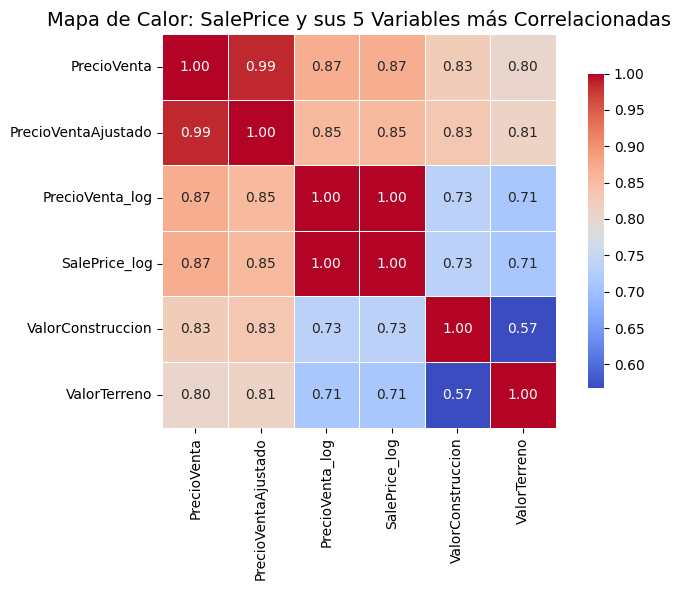

In [ ]:
#  Calcular matriz de correlación completa (si no la tienes ya)
matriz_correlacion = df_limpio.select_dtypes(include=['int64', 'float64']).corr()

# Calcular las correlaciones con 'SalePrice' y ordenarlas
correlaciones_con_saleprice = matriz_correlacion['PrecioVenta'].drop('PrecioVenta').sort_values(ascending=False)

# Obtener las 5 variables más correlacionadas
top_correlaciones = correlaciones_con_saleprice.head(5)
variables_top5 = top_correlaciones.index.tolist()

# Agregar 'SalePrice' para el heatmap
variables_para_heatmap = ['PrecioVenta'] + variables_top5

# Crear submatriz de correlación
sub_matriz_correlacion = df_limpio[variables_para_heatmap].corr()

# Graficar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    sub_matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Mapa de Calor: SalePrice y sus 5 Variables más Correlacionadas", fontsize=14)
plt.tight_layout()
plt.show()


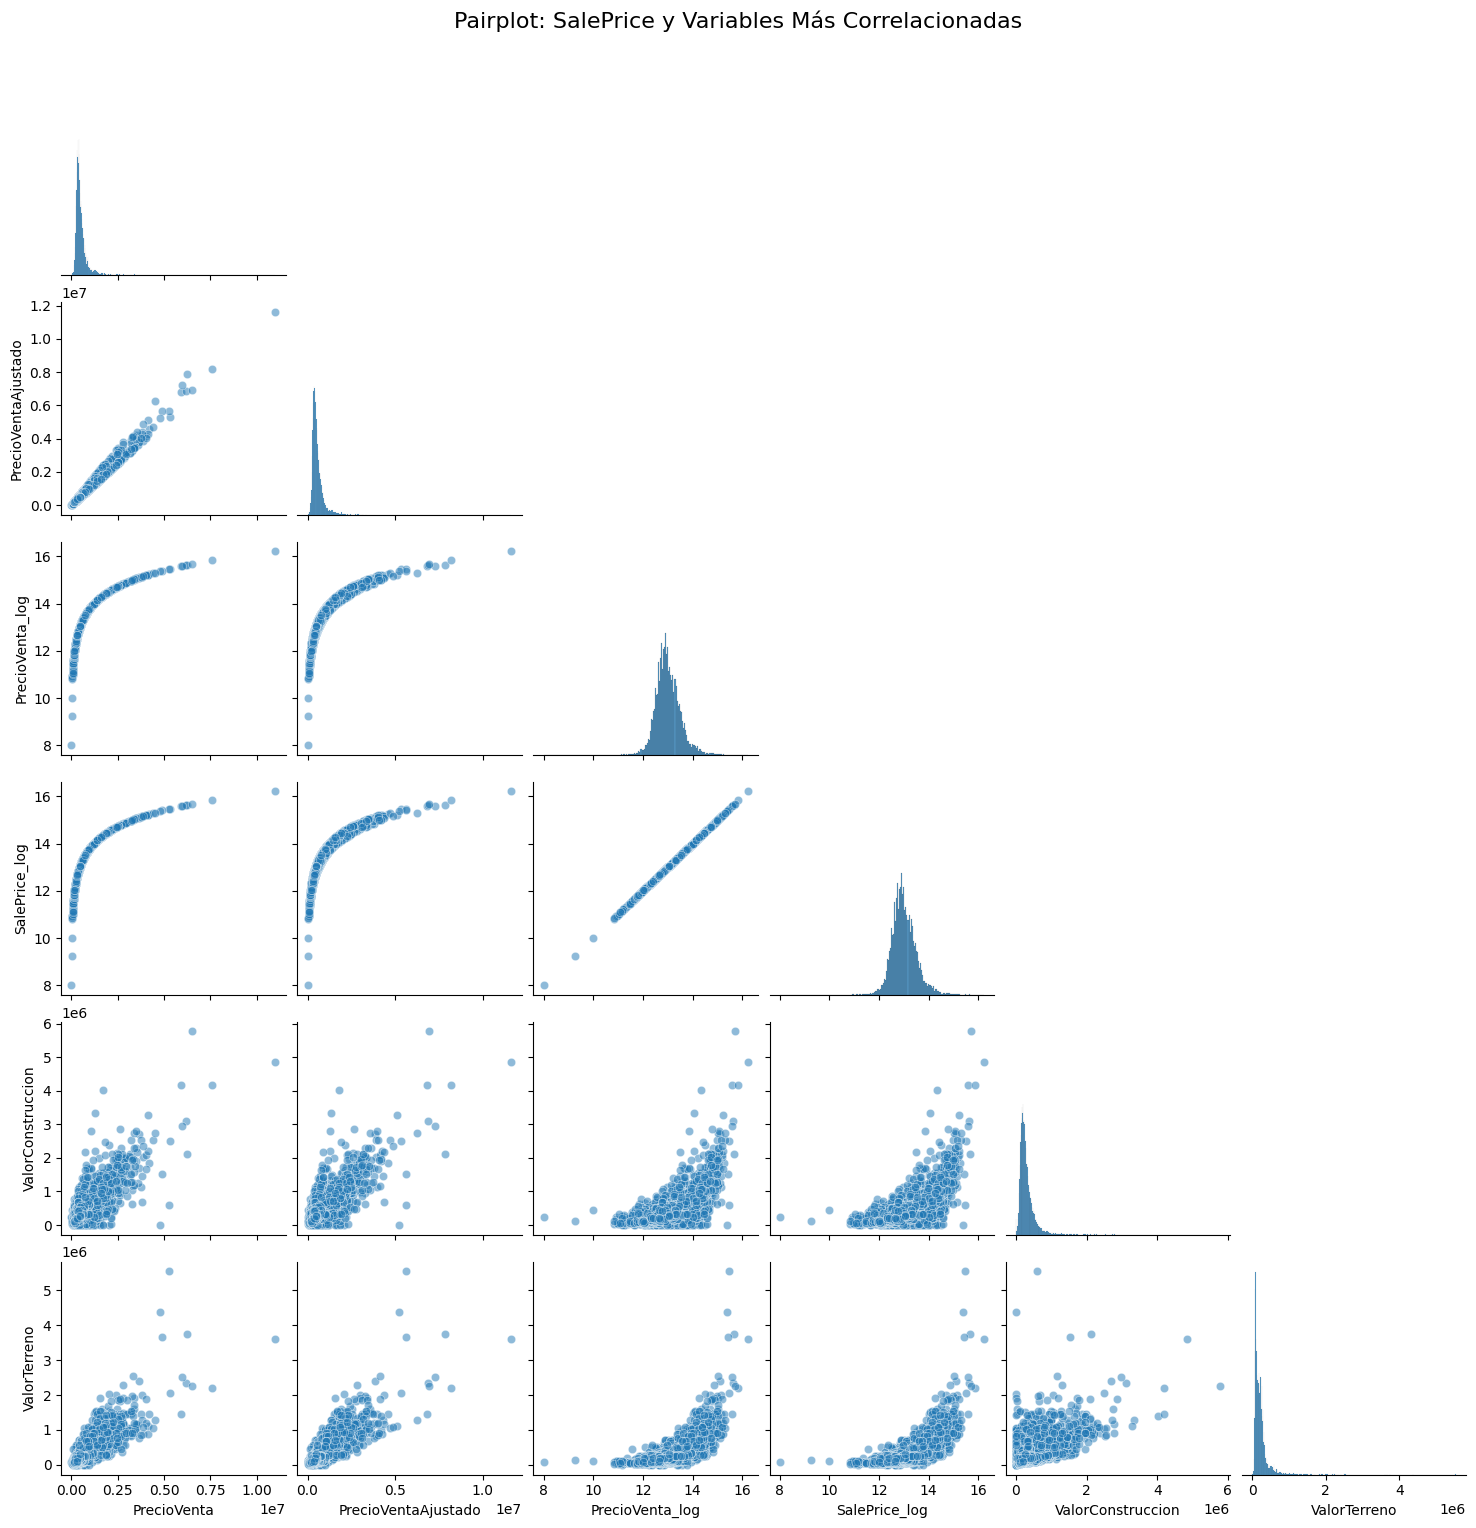

In [ ]:
# Seleccionar las variables para el pairplot (top correlacionadas + SalePrice)
variables_pairplot = ['PrecioVenta'] + variables_top5

# Crear el pairplot
sns.pairplot(df_limpio[variables_pairplot], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot: SalePrice y Variables Más Correlacionadas", y=1.02, fontsize=16)
plt.show()


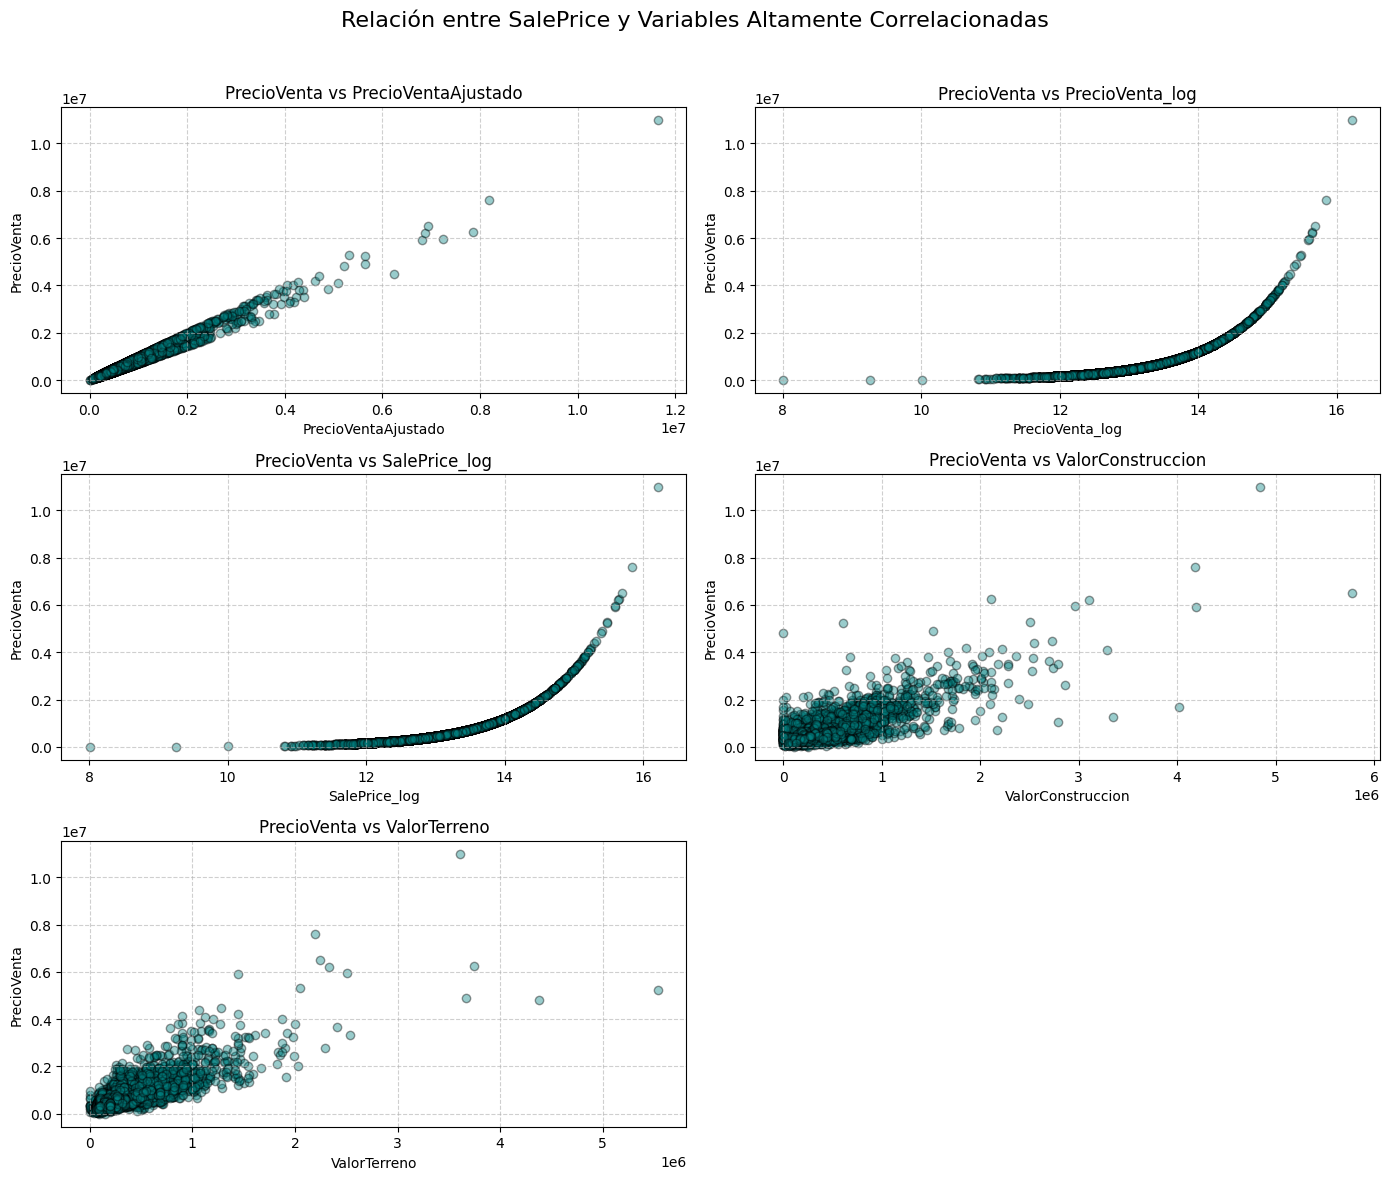

In [ ]:
# Variables más correlacionadas con SalePrice
variables_top5 = top_correlaciones.index.tolist()

# Crear subgráficos: 5 gráficas en una cuadrícula de 3 filas x 2 columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Generar cada scatter plot
for i, var in enumerate(variables_top5):
    axes[i].scatter(df_limpio[var], df_limpio['PrecioVenta'], alpha=0.4, color='teal', edgecolor='k')
    axes[i].set_title(f"PrecioVenta vs {var}", fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("PrecioVenta")
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Eliminar panel vacío si hay menos de 6 variables
for j in range(len(variables_top5), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Relación entre SalePrice y Variables Altamente Correlacionadas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Instalar la librería (solo una vez)
#!pip install prince

# Importar e iniciar el análisis
import prince

# Filtrar solo las variables categóricas
df_cat = df.select_dtypes(include='O').apply(lambda x: x.astype('category'))

# Aplicar MCA
# Paso 5: Aplicar Análisis de Correspondencias Múltiples (MCA/ACM)
mca = prince.MCA(n_components=3, random_state=42)
mca = mca.fit(df_cat)

#  Obtener coordenadas de los individuos
mca_ind = mca.transform(df_cat)

#  Obtener coordenadas de las modalidades (nube de variables)
modalidades = mca.column_coordinates(df_cat)
plt.figure(figsize=(12, 8))
plt.scatter(modalidades[0], modalidades[1], color='green')
for i, label in enumerate(modalidades.index):
    plt.text(modalidades.iloc[i, 0], modalidades.iloc[i, 1],
             label, ha='center', va='center', fontsize=9)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title("Nube de Modalidades - Análisis de Correspondencias Múltiples (ACM)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 7))
sns.scatterplot(x=mca_ind[0], y=mca_ind[1], alpha=0.5)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title("Nube de Individuos - Análisis de Correspondencias Múltiples (ACM)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.tight_layout()
plt.show()
# Clustering K-Means sobre las coordenadas ACM
from sklearn.cluster import KMeans

# Usar 3 clusters como ejemplo
kmeans_acm = KMeans(n_clusters=3, random_state=42)
mca_ind['Cruster_ACM'] = kmeans_acm.fit_predict(mca_ind[[0, 1]])

# Visualización de clusters en el plano ACM
plt.figure(figsize=(10, 7))
sns.scatterplot(data=mca_ind, x=0, y=1, hue='Cruster_ACM', palette='Set1', s=60)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title("Clusters sobre el Espacio ACM")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title='Cluster ACM')
plt.tight_layout()
plt.show()
Z = linkage(modalidades, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(14, 6))
dendrogram(Z, labels=modalidades.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma Jerárquico de Modalidades (ACM)")
plt.xlabel("Modalidades")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()